# Exercise 1f simulating GTT using the Euler method

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## See the function and example below to simulate GTT
This is a numeric simulation, every parameter has a numeric value, and thus we won't use sympy

In [2]:
def Euler_simulate_glucose_insulin(gamma=1,m=1,B=1,q=1,s=1,dt=1/60,sim_length=6): 
    # We use arbitrary values for the parameters
    
    sim_time   = np.arange(0,sim_length,dt)

    # using these parameters, we can calulcate the steady state of the system
    # We will use the steady state of the system as the inital condition
    G0 = np.sqrt((gamma*m)/(B*q*s))
    I0 = np.sqrt((B*m*q)/(gamma*s))

    sim_result = []
    G          = G0
    I          = I0
    for t in sim_time:
        if t < 0.5: # we give pulse of glucose for the first half hour
            m = 2
        else:
            m = 1

        dG = m      - s*I*G
        dI = B*q*G  - gamma*I

        G  = G + dG*dt
        I  = I + dI*dt
        sim_result.append([G,I])
        
    # I store the simulation result in pandas DataFrame because we can plot it easly
    sim = pd.DataFrame(sim_result,columns =['G','I'],index=sim_time) 
    return sim

#### With this function we can easly simulate the dynamics and compare different values for the parameters

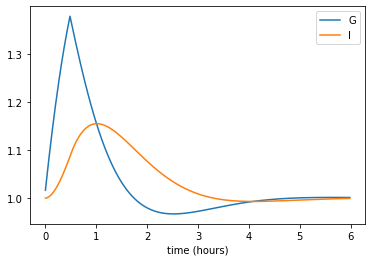

In [3]:
Euler_simulate_glucose_insulin(sim_length=6,dt=1/60).plot()
plt.xlabel('time (hours)'); plt.show()

#### If we will use time jumps that are too big, the method becomes inaccurate

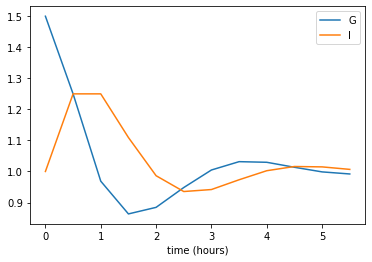

In [4]:
Euler_simulate_glucose_insulin(sim_length=6,dt=1/2).plot()
plt.xlabel('time (hours)'); plt.show()

### What happens to the dynamics if $s$ is low?

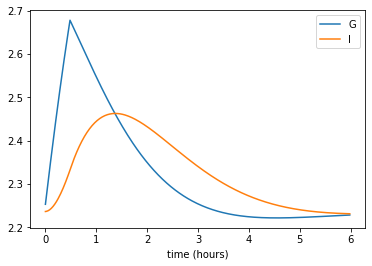

In [5]:
Euler_simulate_glucose_insulin(s=0.2).plot()
plt.xlabel('time (hours)'); plt.show()

### Change some parameters and observe the new dynamics

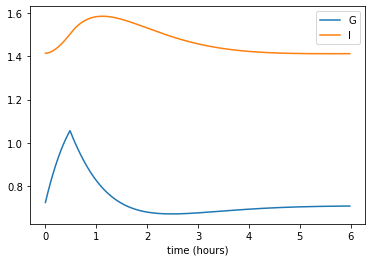

In [6]:
Euler_simulate_glucose_insulin(gamma=0.5).plot()
plt.xlabel('time (hours)'); plt.show()

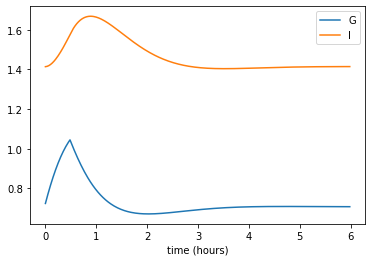

In [7]:
Euler_simulate_glucose_insulin(B=2).plot()
plt.xlabel('time (hours)'); plt.show()